<a href="https://colab.research.google.com/github/drug173/Python/blob/main/Neural_Net/colab_TESSERACT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2build2).
0 upgraded, 0 newly installed, 0 to remove and 22 not upgraded.


In [39]:
!pip install pytesseract



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [40]:
import os
# текущее  расположение
path_dir = os.getcwd()
print(path_dir)

/content


In [41]:
import cv2
import pytesseract
from IPython.display import Image, display
import pathlib
import requests

In [42]:


# Путь для подключения tesseract
# pytesseract.pytesseract.tesseract_cmd = 'C:\\Program Files\\Tesseract-OCR\\tesseract.exe'
#pytesseract.pytesseract.tesseract_cmd = 'C:\\PROG\\Tesseract\\tesseract.exe'

# Подключение фото
img = cv2.imread('1.png')


os.path.exists('1.png')


False

In [43]:
# функция подключения фото!!!
def load_img(img_url):
    p = requests.get(img_url)
    out = open("img.jpg", "wb")
    out.write(p.content)
    out.close()
    img2 = path_dir + '/img.jpg'
    os.path.exists(img2)
    return img2

In [44]:
# функция распознавания

def img_OCR(img_n):
    img = cv2.imread(img_n)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Будет выведен весь текст с картинки
    config = r'--oem 3 --psm 6'
    data = pytesseract.image_to_data(img, config=config)
    print("Распознанный текст с картинки")
    print(pytesseract.image_to_string(img, config=config))
    # Перебираем данные про текстовые надписи
    for i, el in enumerate(data.splitlines()):
        #print('el', el)
        if i == 0:
            continue

        el = el.split()
        #print('el', el)
        try:
            # Создаем подписи на картинке
            x, y, w, h = int(el[6]), int(el[7]), int(el[8]), int(el[9])
            cv2.rectangle(img, (x, y), (w + x, h + y), (0, 50, 255), 1)
            cv2.putText(img, el[11], (x, y), cv2.FONT_HERSHEY_COMPLEX, 1, (50, 50, 50), 1)
        except IndexError:
            print("Операция была пропущена")

    # Отображаем фото
    #cv2.imshow('Result', img)          # отображает результат в отдельном окне
    cv2.imwrite('savedImage1.jpg', img)
    path = pathlib.Path('savedImage1.jpg')
    display(Image(filename=path))       # отображает изображение с результататом в блокноте 
    cv2.waitKey(0)
   

In [45]:
url_img = "https://slavclub.ru/wp-content/uploads/2021/07/count.jpg"



In [46]:
# Загружаем фото
img = load_img(url_img)

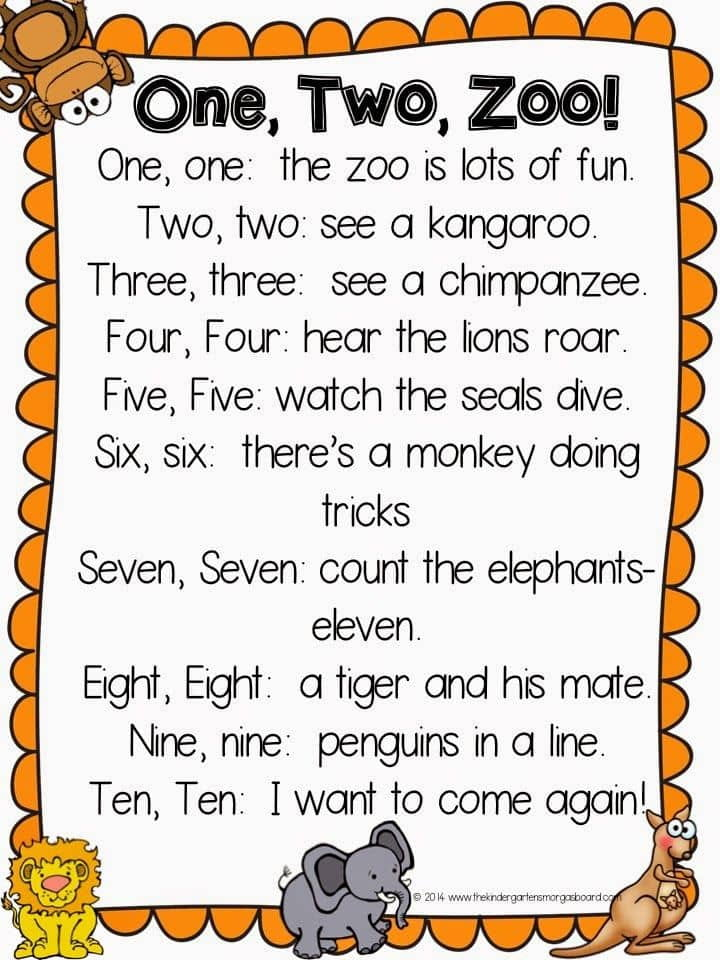

In [47]:
# Посмотреть фото
path = pathlib.Path(img)

display(Image(filename=path))

# такое изображение не расспознаёт (каша)

Распознанный текст с картинки
oo’ One, Two, ZOO!
One, one: the zoo is lots of fun.
Two, two: see a kangaroo.
Three, three: see a chimpanzee.
Four, Four: hear the lions roar.
Five, Five: watch the seals dive.
Six, Six: there’s a monkey doing
tricks
Seven, Seven: count the eleohants-
eleven.

Eight, Eight: a tiger and his mate.
Nine, nine: penguins in a line.
Ten, Ten: | want to come again! D

Операция была пропущена
Операция была пропущена
Операция была пропущена
Операция была пропущена
Операция была пропущена
Операция была пропущена
Операция была пропущена
Операция была пропущена
Операция была пропущена
Операция была пропущена
Операция была пропущена
Операция была пропущена
Операция была пропущена
Операция была пропущена
Операция была пропущена
Операция была пропущена
Операция была пропущена


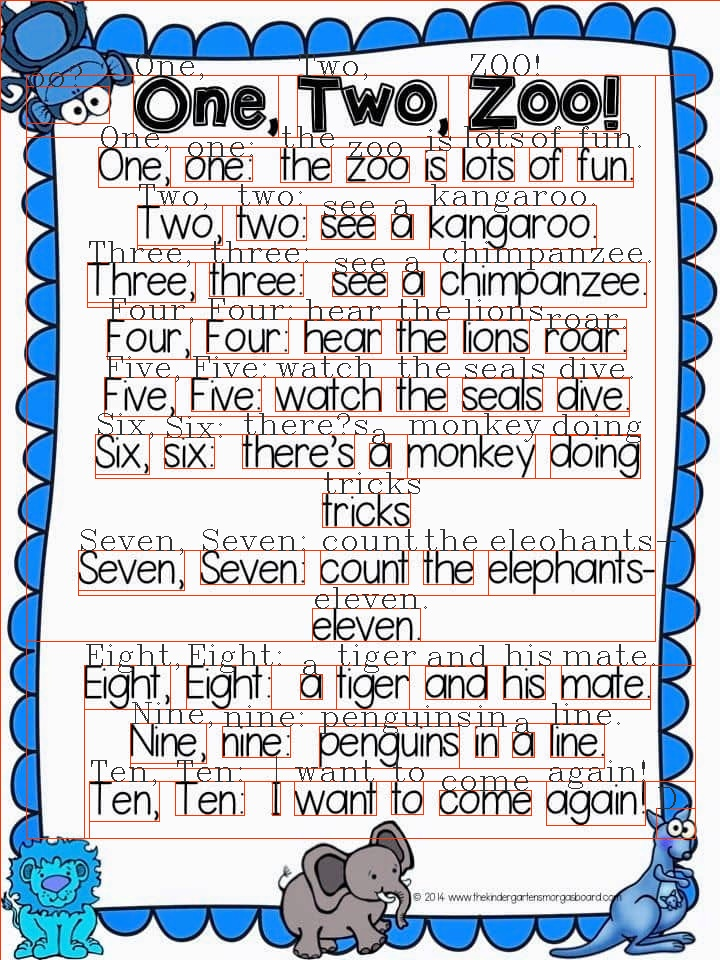

In [48]:
img_OCR(img)